# Diagnostic Analytics

## Loading the cleaned dataset

In [1]:
import pandas as pd

file_name = '../assets/ObesityDataSet_BMI.parquet'
df = pd.read_parquet(file_name)
df.head()

,Gender,Age,Height,Weight,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Main_meals_count,Food_between_meals_freq,Smokes,Water_consumption,Monitors_calories,Physical_activity,Screen_time,Alcohol_consumption_freq,Transportation_mode,Obesity_level,BMI
0,Female,21,1.62,64.0,True,False,Sometimes,Three,Sometimes,False,Between 1 and 2 L,False,I do not,3-5 hours,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21,1.52,56.0,True,False,Always,Three,Sometimes,True,More than 2 L,True,4 or 5 days,0-2 hours,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23,1.80,77.0,True,False,Sometimes,Three,Sometimes,False,Between 1 and 2 L,False,2 or 4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27,1.80,87.0,False,False,Always,Three,Sometimes,False,Between 1 and 2 L,False,2 or 4 days,0-2 hours,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22,1.78,89.8,False,False,Sometimes,Between 1 and 2,Sometimes,False,Between 1 and 2 L,False,I do not,0-2 hours,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


**Check structure:**

In [2]:
df.shape

(2111, 18)

**Check datatypes of the features:**

In [3]:
df.dtypes

Gender                       category
Age                             int64
Height                        float64
Weight                        float64
Family_history_overweight     boolean
High_caloric_food             boolean
Veggie_consumption_freq      category
Main_meals_count             category
Food_between_meals_freq      category
Smokes                        boolean
Water_consumption            category
Monitors_calories             boolean
Physical_activity            category
Screen_time                  category
Alcohol_consumption_freq     category
Transportation_mode          category
Obesity_level                category
BMI                           float64
dtype: object

**Check all the categorical columns and distinguish whether they are ordered or not:**

In [4]:
for c in df.select_dtypes(['category']).columns:
    dt = df[c].dtype    
    print(f'{c:25s} | ordered={dt.ordered} | categories={list(dt.categories)}')

Gender                    | ordered=False | categories=['Female', 'Male']
Veggie_consumption_freq   | ordered=True | categories=['Never', 'Sometimes', 'Always']
Main_meals_count          | ordered=True | categories=['Between 1 and 2', 'Three', 'More than three']
Food_between_meals_freq   | ordered=True | categories=['no', 'Sometimes', 'Frequently', 'Always']
Water_consumption         | ordered=True | categories=['Less than a liter', 'Between 1 and 2 L', 'More than 2 L']
Physical_activity         | ordered=True | categories=['I do not', '1 or 2 days', '2 or 4 days', '4 or 5 days']
Screen_time               | ordered=True | categories=['0-2 hours', '3-5 hours', 'More than 5 hours']
Alcohol_consumption_freq  | ordered=True | categories=['no', 'Sometimes', 'Frequently', 'Always']
Transportation_mode       | ordered=False | categories=['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']
Obesity_level             | ordered=True | categories=['Insufficient_Weight', 'Normal_

- Comments: We can see that only Gender and Transportation_mode are ordinal variables, while all other categorical columns are nominal variables.

## Data Processing

#### 1. One-Hot Encoding: Norminal feature

- Only process the Transportation_mode column, because the Gender column has only two categories, which can be equivalent to boolean variables.

In [5]:
df['Transportation_mode'].unique()

['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
Categories (5, object): ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']

In [6]:
transportation_idx = df.columns.get_loc("Transportation_mode")
Transportation_one_hot = pd.get_dummies(df["Transportation_mode"]).astype(int)

df = df.drop("Transportation_mode", axis=1)

for i, col in enumerate(Transportation_one_hot.columns):
    df.insert(transportation_idx + i, col, Transportation_one_hot[col])

# Rename columns of Transportation_mode one-hot encoding
df = df.rename(
    columns={
        "Automobile":"Automobile_transportation",
        "Bike":"Bike_transportation",
        "Motorbike":"Motorbike_transportation",
        "Public_Transportation":"Public_Transportation_transportation",
        "Walking":"Walking_transportation"
    }
)

df.head()

,Gender,Age,Height,Weight,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Main_meals_count,Food_between_meals_freq,Smokes,...,Physical_activity,Screen_time,Alcohol_consumption_freq,Automobile_transportation,Bike_transportation,Motorbike_transportation,Public_Transportation_transportation,Walking_transportation,Obesity_level,BMI
0,Female,21,1.62,64.0,True,False,Sometimes,Three,Sometimes,False,...,I do not,3-5 hours,no,0,0,0,1,0,Normal_Weight,24.386526
1,Female,21,1.52,56.0,True,False,Always,Three,Sometimes,True,...,4 or 5 days,0-2 hours,Sometimes,0,0,0,1,0,Normal_Weight,24.238227
2,Male,23,1.80,77.0,True,False,Sometimes,Three,Sometimes,False,...,2 or 4 days,3-5 hours,Frequently,0,0,0,1,0,Normal_Weight,23.765432
3,Male,27,1.80,87.0,False,False,Always,Three,Sometimes,False,...,2 or 4 days,0-2 hours,Frequently,0,0,0,0,1,Overweight_Level_I,26.851852
4,Male,22,1.78,89.8,False,False,Sometimes,Between 1 and 2,Sometimes,False,...,I do not,0-2 hours,Sometimes,0,0,0,1,0,Overweight_Level_II,28.342381


#### 2. Ordinal Encoding: Ordinal feature

In [7]:
# Veggie_consumption_freq
labels, unique = pd.factorize(df["Veggie_consumption_freq"], sort=True)
df["Veggie_consumption_freq"] = labels

# Main_meals_count
labels, unique = pd.factorize(df["Main_meals_count"], sort=True)
df["Main_meals_count"] = labels

# Food_between_meals_freq
labels, unique = pd.factorize(df["Food_between_meals_freq"], sort=True)
df["Food_between_meals_freq"] = labels

# Water_consumption
labels, unique = pd.factorize(df["Water_consumption"], sort=True)
df["Water_consumption"] = labels

# Physical_activity
labels, unique = pd.factorize(df["Physical_activity"], sort=True)
df["Physical_activity"] = labels

# Screen_time
labels, unique = pd.factorize(df["Screen_time"], sort=True)
df["Screen_time"] = labels

# Alcohol_consumption_freq
labels, unique = pd.factorize(df["Alcohol_consumption_freq"], sort=True)
df["Alcohol_consumption_freq"] = labels

# Obesity_level
labels, unique = pd.factorize(df["Obesity_level"], sort=True)
df["Obesity_level"] = labels

df.head()


,Gender,Age,Height,Weight,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Main_meals_count,Food_between_meals_freq,Smokes,...,Physical_activity,Screen_time,Alcohol_consumption_freq,Automobile_transportation,Bike_transportation,Motorbike_transportation,Public_Transportation_transportation,Walking_transportation,Obesity_level,BMI
0,Female,21,1.62,64.0,True,False,1,1,1,False,...,0,1,0,0,0,0,1,0,1,24.386526
1,Female,21,1.52,56.0,True,False,2,1,1,True,...,3,0,1,0,0,0,1,0,1,24.238227
2,Male,23,1.80,77.0,True,False,1,1,1,False,...,2,1,2,0,0,0,1,0,1,23.765432
3,Male,27,1.80,87.0,False,False,2,1,1,False,...,2,0,2,0,0,0,0,1,2,26.851852
4,Male,22,1.78,89.8,False,False,1,0,1,False,...,0,0,1,0,0,0,1,0,3,28.342381


#### 3. Integerization: Boolean feature

In [8]:
# Gender (Gender has only two categories, which can be equivalent to boolean)
df['Gender'] = (df['Gender'] == 'Male').astype(int)

# Family_history_overweight
df['Family_history_overweight'] = (df['Family_history_overweight'] == True).astype(int)

# High_caloric_food
df['High_caloric_food'] = (df['High_caloric_food'] == True).astype(int)

# Smokes
df['Smokes'] = (df['Smokes'] == True).astype(int)

# Monitors_calories
df['Monitors_calories'] = (df['Monitors_calories'] == True).astype(int)

df.head()

,Gender,Age,Height,Weight,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Main_meals_count,Food_between_meals_freq,Smokes,...,Physical_activity,Screen_time,Alcohol_consumption_freq,Automobile_transportation,Bike_transportation,Motorbike_transportation,Public_Transportation_transportation,Walking_transportation,Obesity_level,BMI
0,0,21,1.62,64.0,1,0,1,1,1,0,...,0,1,0,0,0,0,1,0,1,24.386526
1,0,21,1.52,56.0,1,0,2,1,1,1,...,3,0,1,0,0,0,1,0,1,24.238227
2,1,23,1.80,77.0,1,0,1,1,1,0,...,2,1,2,0,0,0,1,0,1,23.765432
3,1,27,1.80,87.0,0,0,2,1,1,0,...,2,0,2,0,0,0,0,1,2,26.851852
4,1,22,1.78,89.8,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,3,28.342381


In [9]:
df.dtypes

Gender                                    int64
Age                                       int64
Height                                  float64
Weight                                  float64
Family_history_overweight                 int64
High_caloric_food                         int64
Veggie_consumption_freq                   int64
Main_meals_count                          int64
Food_between_meals_freq                   int64
Smokes                                    int64
Water_consumption                         int64
Monitors_calories                         int64
Physical_activity                         int64
Screen_time                               int64
Alcohol_consumption_freq                  int64
Automobile_transportation                 int64
Bike_transportation                       int64
Motorbike_transportation                  int64
Public_Transportation_transportation      int64
Walking_transportation                    int64
Obesity_level                           

## Heatmap


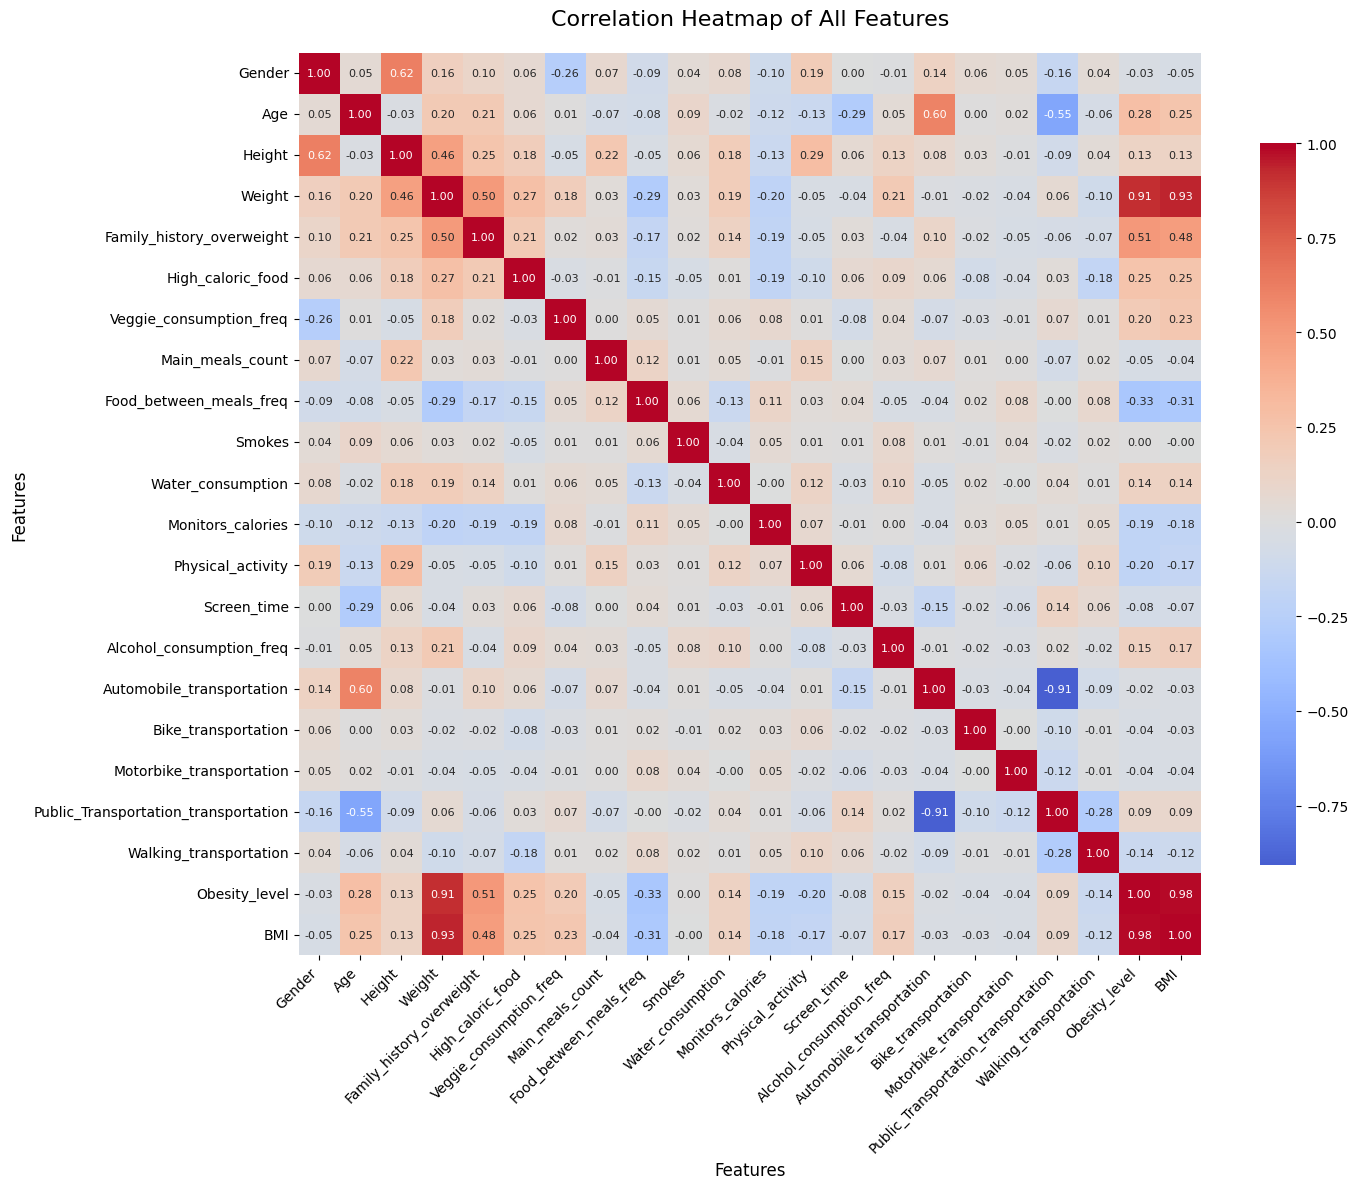

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(15, 12))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show values
            cmap='coolwarm',      # Color mapping
            center=0,             # Center value at 0
            square=True,          # Square cells
            fmt='.2f',            # Number format, 2 decimal places
            cbar_kws={'shrink': 0.8},  # Color bar size
            annot_kws={'size': 8})     # Annotation text size

# Set title and labels
plt.title('Correlation Heatmap of All Features', fontsize=16, pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Save df as parquet

In [11]:
df.to_parquet('../assets/ObesityDataSet_BMI_one_hot.parquet', index=False)

## Three diagnostic analysis questions

#### 1. What is the correlation coefficient between Veggie_consumption_freq and Physical_activity calculated using the Pearson method? Is this relationship a positive correlation or a negative correlation?

In [13]:
# Calculate Pearson correlation coefficient between Veggie_consumption_freq and Physical_activity
correlation_coeff = df['Veggie_consumption_freq'].corr(df['Physical_activity'], method='pearson')

print(f"Pearson correlation coefficient between Veggie_consumption_freq and Physical_activity: {correlation_coeff:.4f}")

# Determine if the correlation is positive, negative, or none
if correlation_coeff > 0:
    correlation_type = "positive correlation"
elif correlation_coeff < 0:
    correlation_type = "negative correlation"
else:
    correlation_type = "no correlation"

print(f"This relationship is a {correlation_type}.")

# Additional information: Assessing correlation strength
abs_corr = abs(correlation_coeff)
if abs_corr >= 0.7:
    strength = "strong"
elif abs_corr >= 0.3:
    strength = "moderate"
else:
    strength = "weak"

print(f"The correlation strength is {strength} (|r| = {abs_corr:.4f}).")

Pearson correlation coefficient between Veggie_consumption_freq and Physical_activity: 0.0137
This relationship is a positive correlation.
The correlation strength is weak (|r| = 0.0137).


#### Answer Questions 2 and 3 under the following conditions: 

- Correlation Methods: Spearman
- Selected Features: All except for Height, Weight, Obesity_level


#### 2. Which pairs of features are among the top 5 in terms of correlation coefficient? What is the maximum value?

In [16]:
# Select features (excluding Height, Weight, Obesity_level)
selected_features = [col for col in df.columns if col not in ['Height', 'Weight', 'Obesity_level']]

# Calculate Spearman correlation coefficients
corr_matrix = df[selected_features].corr(method='spearman')

# Get upper triangular matrix (excluding diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
corr_upper = corr_matrix.where(mask).stack().reset_index()
corr_upper.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Sort by absolute value and take top 5
top_5 = corr_upper.reindex(corr_upper['Correlation'].abs().sort_values(ascending=False).index).head(5)

print("Top 5 Feature Pairs (Spearman correlation):")
for i, row in top_5.iterrows():
    print(f"{len(top_5) - list(top_5.index).index(i)}. {row['Feature_1']} ↔ {row['Feature_2']}: {row['Correlation']:.3f}")

print(f"\nMaximum correlation coefficient: {top_5.iloc[0]['Correlation']:.3f}")

Top 5 Feature Pairs (Spearman correlation):
5. Automobile_transportation ↔ Public_Transportation_transportation: -0.907
4. Family_history_overweight ↔ BMI: 0.498
3. Age ↔ Automobile_transportation: 0.480
2. Age ↔ Public_Transportation_transportation: -0.428
1. Age ↔ BMI: 0.400

Maximum correlation coefficient: -0.907


#### 3. When the Threshold for High Correlation is set to 0.5, how many pairs meet the criteria?


In [ ]:
# 沿用前面的设置
selected_features = [col for col in df.columns if col not in ['Height', 'Weight', 'Obesity_level']]
corr_matrix = df[selected_features].corr(method='spearman')

# 上三角矩阵（排除对角线）
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
corr_masked = corr_matrix.where(mask)

# 统计阈值≥0.5的配对数量
threshold = 0.5
high_corr_count = (corr_masked.abs() >= threshold).sum().sum()

print(f"Number of feature pairs with |correlation| ≥ {threshold}: {high_corr_count}")

Number of feature pairs with |correlation| ≥ 0.5: 1
Percentage: 0.6% (1/171)
